In [12]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = '12'
plt.rcParams['hist.bins'] = '10'

In [13]:
ticker = "AMD"
sdate = "2020-01-01"
edate = '2022-03-22'
df = pdr.get_data_yahoo(ticker, start = sdate, end=edate)

In [14]:
#convert column names to lower case
df.columns = [i.lower() for i in df.columns]
df = df.drop(columns=['high','low','close','volume','open'])
df = df.rename(columns={'adj close':'adj_close'})
df = df.sort_index(ascending=False)

In [15]:
df['rel_rets'] = df.pct_change(-1)
df['abs_rets'] = df['adj_close'] - df['adj_close'].shift(-1)

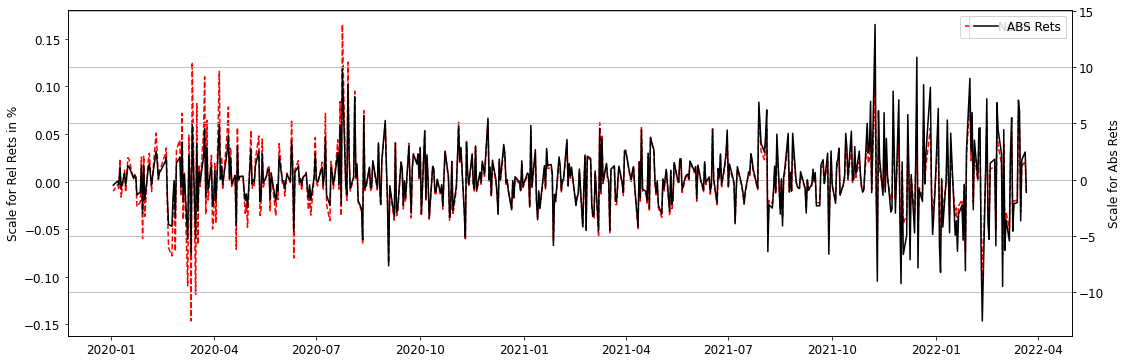

In [16]:
## Plot axis
ax = plt.axes()
ax1 = ax.plot(df.rel_rets, 'r--', label='Norm Rets')
plt.legend()
bx=ax.twinx()

ax2 = bx.plot(df.abs_rets, 'k-', label='ABS Rets')
plt.grid(axis='both')
ax.set_ylabel('Scale for Rel Rets in %')
bx.set_ylabel('Scale for Abs Rets')
plt.legend()
plt.show()

In [17]:
import plotly.graph_objects as go
import chart_studio.plotly as px
import plotly.express as py
import cufflinks as cf

In [18]:
from cufflinks import tools

cf.set_config_file(theme='pearl',sharing='public',offline=True)

fig = go.Figure(**tools.merge_figures([
    df.figure(columns=['rel_rets'], kind='line'),
    df.figure(columns=['abs_rets'], kind='line', color='grey', rangeslider=True, opacity=0.1, fill=True)
])).set_axis(['abs_rets'], side='right')


fig.update_layout(
    #title='Price and Change for {}'.format(ticker),
    )

cf.iplot(fig)

In [22]:
print('Stdev of Relative Returns: ', df.rel_rets.std())
print('Stdev of Absolute Returns: ', df.abs_rets.std())

Stdev of Relative Returns:  0.0340789392463941
Stdev of Absolute Returns:  2.990401149453559
